In [1]:
%run ../methodes/ada_boost_definition.ipynb import Ada_Boost_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [2]:
# Valeurs à tester : nombre d'estimateurs et taux d'apprentissage
n_estimators_ = [10*i for i in range(5,10)]
learning_rates = np.logspace(-3, 0.001, 10)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
ada_boost_best_n_estimators = -2
ada_boost_best_learning_rate = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_ab_train = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)
df_ab_test = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)

In [5]:
%%capture --no-display
%run utils.ipynb import K_Fold

for n_estimators in n_estimators_:
    for learning_rate in learning_rates:
        
        # Validation croisée avec K_Fold
        err_train, err_test = K_Fold(10, df_train, Ada_Boost_(n_estimators, learning_rate))

        # Calcul de l'erreur totale
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_ab_train[learning_rate][n_estimators] = err_train
        df_ab_test[learning_rate][n_estimators] = err_test
                
        # On met à jour les meilleurs hyperparamètres
        if err < err_min:
            err_min = err
            ada_boost_best_n_estimators = n_estimators
            ada_boost_best_learning_rate = learning_rate

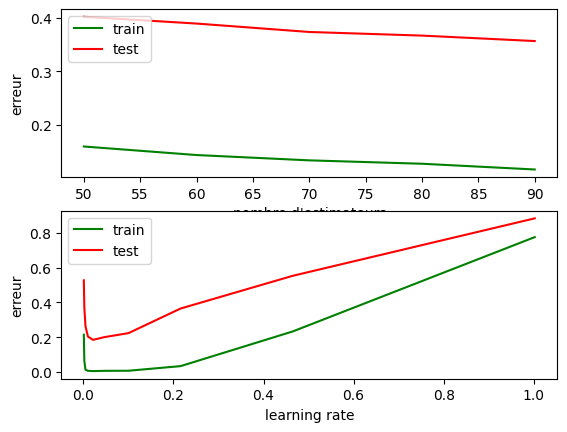

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du nombre d'estimateurs
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(2,1,2) 
plot_df(df_ab_train, df_ab_test, 'learning rate', 'columns', True)

In [7]:
# Affichage des meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | best number of estimators : ', ada_boost_best_n_estimators, 
      ' | best learning rate : ', ada_boost_best_learning_rate)

err_min :  0.0925925925925926  | best number of estimators :  90  | best learning rate :  0.02156640604885776


In [8]:
# On stocke en mémoire les meilleurs hyperparamètres trouvés
%store ada_boost_best_n_estimators
%store ada_boost_best_learning_rate

Stored 'ada_boost_best_n_estimators' (int)
Stored 'ada_boost_best_learning_rate' (float64)


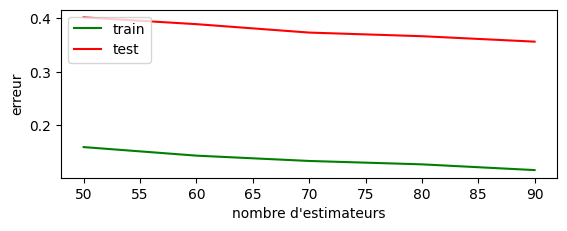

In [10]:
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)